In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df = pd.read_csv("Titanic-Dataset.csv")
df = pd.DataFrame(df)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [45]:
#P(Survived) – the probability that a passenger survived
P_survived = round(df['Survived'].mean(),2)
print("P(Survived):", P_survived)

#Overall survival rate (P(Survived) ≈ 38%)
#Less than half of passengers survived

P(Survived): 0.38


In [54]:
#P(Survived | Sex = 'female') – the probability of survival given that the passenger is female.
P_survived_female = round(df[df['Sex'] == 'female']['Survived'].mean(),2)
print("P(Survived | Sex='female'):", P_survived_female)

#Gender bias: P(Survived | female) ≈ 74% > P(Survived | male) ≈ 19%
#Females had a much higher chance of survival, reflecting the “women and children first” policy during evacuation.

P(Survived | Sex='female'): 0.74


In [55]:
#P(Survived | Pclass = 1) – the probability that a first-class passenger survived
P_survived_pclass1 = round(df[df['Pclass'] == 1]['Survived'].mean(),2)
print("P(Survived | Pclass=1):", P_survived_pclass1)

#Class bias: P(Survived | Pclass=1) ≈ 63% > P(Survived | Pclass=3) ≈ 25%

P(Survived | Pclass=1): 0.63


In [56]:
#P(Sex = 'female' | Survived = 1) – the probability that a passenger was female given that they survived
P_female_given_survived = (
    round(df[df['Survived'] == 1]['Sex'].value_counts(normalize=True)['female'],2)
)
print("P(Sex='female' | Survived=1):", P_female_given_survived)

#Among survivors: P(Female | Survived) ≈ 68%
#Most survivors were women, confirming strong gender influence on survival

P(Sex='female' | Survived=1): 0.68


In [ ]:
#There was a clear gender bias — women were prioritized for rescue.
#There was also a social-class bias — first-class passengers had better access to lifeboats and safety.
#Together, these probabilities highlight the inequality of survival based on both sex and class during the Titanic disaster.

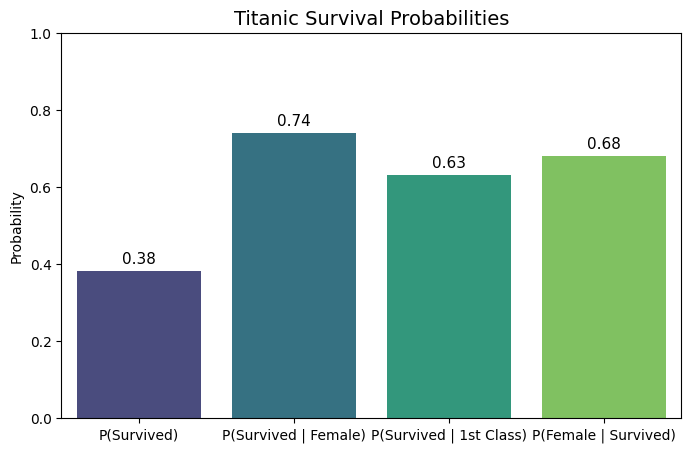

In [49]:
prob_df = pd.DataFrame({
    'Probability': [
        P_survived,
        P_survived_female,
        P_survived_pclass1,
        P_female_given_survived
    ],
    'Description': [
        'P(Survived)',
        'P(Survived | Female)',
        'P(Survived | 1st Class)',
        'P(Female | Survived)'
    ]
})

#bar plot
plt.figure(figsize=(8,5))
sns.barplot(
    data=prob_df,
    x='Description',
    y='Probability',
    hue='Description',   # Add this
    palette='viridis',
    legend=False         # Hide duplicate legend
)

plt.title('Titanic Survival Probabilities', fontsize=14)
plt.ylabel('Probability')
plt.xlabel('')
plt.ylim(0, 1)

# Display values on top of bars
for i, val in enumerate(prob_df['Probability']):
    plt.text(i, val + 0.02, f"{val:.2f}", ha='center', fontsize=11)

plt.show()



In [ ]:
#Bars near 0.7 – 0.8 (P(Survived | Female)) show that most women survived.
#First-class passengers had much higher survival (around 0.6).
#Overall survival was only around 0.38.
#Among survivors, most were female (P(Female | Survived) ≈ 0.68)

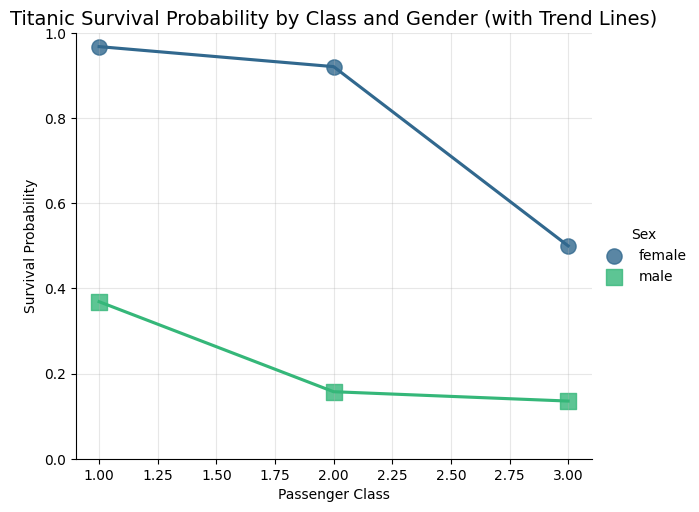

In [50]:
# Compute survival probabilities by class and sex
survival_by_group = df.groupby(['Pclass', 'Sex'])['Survived'].mean().reset_index()

#Scatter with Trend Line 
sns.lmplot(
    data=survival_by_group,
    x='Pclass',
    y='Survived',
    hue='Sex',
    markers=['o', 's'],
    palette='viridis',
    height=5,
    aspect=1.2,
    scatter_kws={'s': 120},
    ci=None,          # No confidence interval shading
    lowess=True       # Smooth trend line instead of linear fit
)

# Customize labels and appearance
plt.title('Titanic Survival Probability by Class and Gender (with Trend Lines)', fontsize=14)
plt.xlabel('Passenger Class')
plt.ylabel('Survival Probability')
plt.ylim(0, 1)
plt.grid(alpha=0.3)
plt.show()

In [ ]:
#Female survival rates are consistently higher in all classes.
#Even third-class women survived more often than first-class men.
#The gap between the lines shows strong gender bias, while the slope shows class bias (better survival in higher classes).